In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

import joblib

import warnings
warnings.filterwarnings('ignore')


In [3]:
df =pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

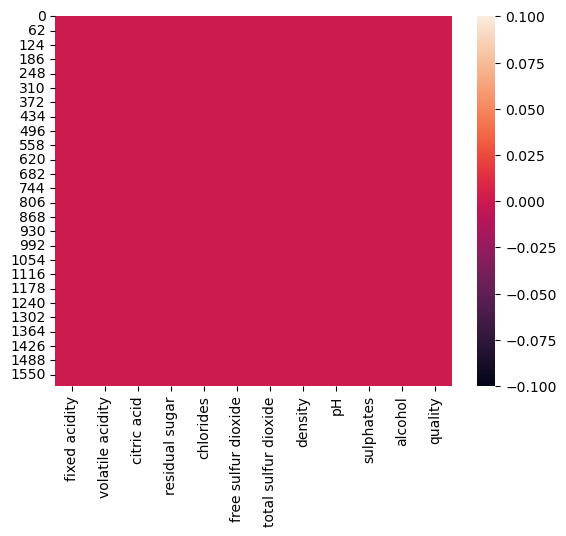

In [16]:
import seaborn as sns
sns.heatmap(df.isnull())

In [17]:
df.nunique().to_frame("no.of unique values")

,no.of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


# univariate analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


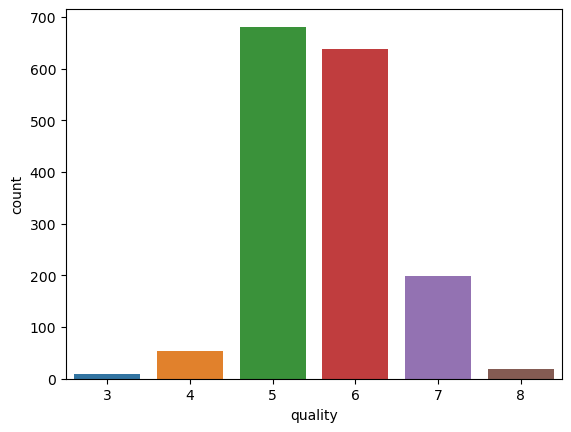

In [18]:
ax = sns.countplot(x='quality', data= df)
print(df['quality'].value_counts())

In [19]:
# replace (original. new one) 
df.quality =df.quality.replace(3,5)
df.quality =df.quality.replace(4,5)
df.quality =df.quality.replace(7,6)
df.quality =df.quality.replace(8,6)

df.quality.value_counts().to_frame()

,quality
6,855
5,744


here we can consider as 5 is bad quality and 6 is good quality 

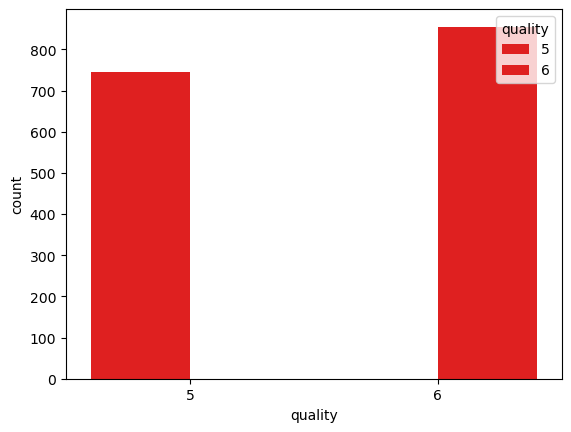

In [20]:
sns.countplot(x='quality',hue='quality',palette=['red'],data=df)
plt.title="wine quality distribution"
plt.show()

we can see here the data is balence.

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
best_feature  = SelectKBest(score_func = f_classif,k = 6)

In [24]:
# x = feature and y = label/ target variable
x =df.drop('quality', axis = 1) 
y = df.quality

In [25]:
df.shape

(1599, 12)

In [28]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [42]:
Best_features = SelectKBest(score_func = f_classif, k= 7)
fit = Best_features.fit(x,y) 
df_scores =  pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concanate dataframe

feature_scores = pd.concat([df_columns, df_scores], axis= 1)
feature_scores.columns = ['Feature_name', 'Score']
print(feature_scores.nlargest(7,'Score'))

            Feature_name       Score
10               alcohol  372.194765
1       volatile acidity  184.022796
6   total sulfur dioxide   90.816016
9              sulphates   79.737680
2            citric acid   41.490123
7                density   41.479723
4              chlorides   19.378659


In [43]:
newdf = df[['alcohol','volatile acidity','total sulfur dioxide','sulphates', 'citric acid','density','chlorides']]
newdf

,alcohol,volatile acidity,total sulfur dioxide,sulphates,citric acid,density,chlorides
0,9.4,0.700,34.0,0.56,0.00,0.99780,0.076
1,9.8,0.880,67.0,0.68,0.00,0.99680,0.098
2,9.8,0.760,54.0,0.65,0.04,0.99700,0.092
3,9.8,0.280,60.0,0.58,0.56,0.99800,0.075
4,9.4,0.700,34.0,0.56,0.00,0.99780,0.076
...,...,...,...,...,...,...,...
1594,10.5,0.600,44.0,0.58,0.08,0.99490,0.090
1595,11.2,0.550,51.0,0.76,0.10,0.99512,0.062
1596,11.0,0.510,40.0,0.75,0.13,0.99574,0.076
1597,10.2,0.645,44.0,0.71,0.12,0.99547,0.075


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(newdf)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier


In [47]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.25, random_state = 355)

In [56]:
def metric_score(clf,x_train,x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n------Train Result------')
        print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100:.2f}%")
    
    elif train == False :
        pred = clf.predict(x_test)
        print('\n------Train Result------')
        print(f"Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n Test classification report \n ', classification_report ( y_test,pred,digits =2))

In [50]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [57]:
metric_score(knn,x_train, x_test, y_train, y_test, train=True)
metric_score(knn,x_train, x_test, y_train, y_test, train=False)


------Train Result------
Accuracy score : 76.81%

------Train Result------
Accuracy score : 67.00%


 Test classification report 
                precision    recall  f1-score   support

           5       0.66      0.66      0.66       194
           6       0.68      0.68      0.68       206

    accuracy                           0.67       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.67      0.67       400



In [58]:
cor = newdf.corr()
cor

,alcohol,volatile acidity,total sulfur dioxide,sulphates,citric acid,density,chlorides
alcohol,1.000000,-0.202288,-0.205654,0.093595,0.109903,-0.496180,-0.221141
volatile acidity,-0.202288,1.000000,0.076470,-0.260987,-0.552496,0.022026,0.061298
total sulfur dioxide,-0.205654,0.076470,1.000000,0.042947,0.035533,0.071269,0.047400
sulphates,0.093595,-0.260987,0.042947,1.000000,0.312770,0.148506,0.371260
citric acid,0.109903,-0.552496,0.035533,0.312770,1.000000,0.364947,0.203823
density,-0.496180,0.022026,0.071269,0.148506,0.364947,1.000000,0.200632
chlorides,-0.221141,0.061298,0.047400,0.371260,0.203823,0.200632,1.000000


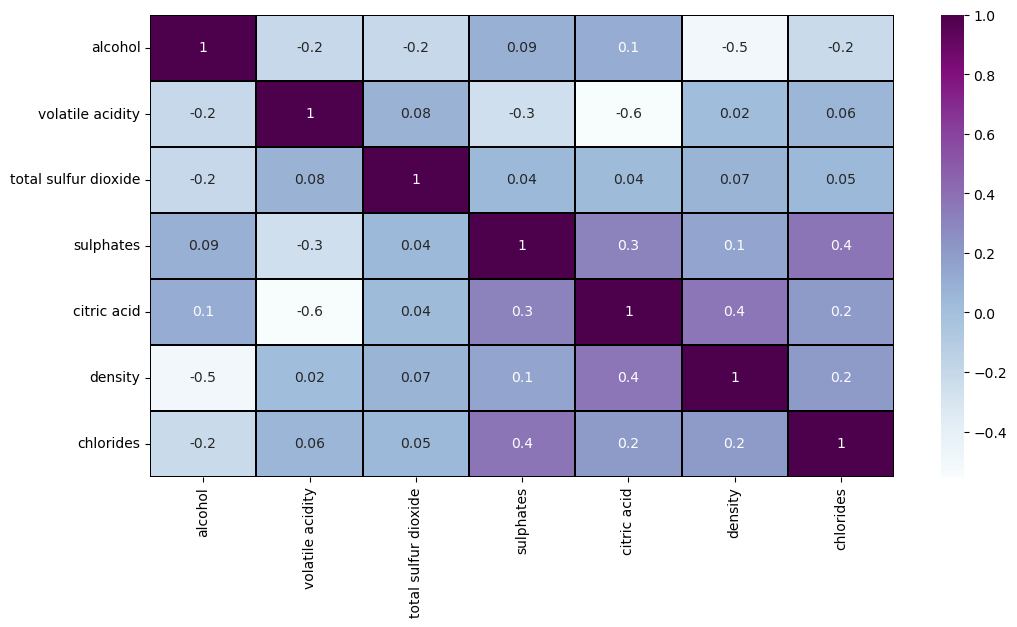

In [60]:
plt.figure(figsize = (12,6))
sns.heatmap(newdf.corr(), linewidths =0.1,fmt= '0.1g', linecolor = 'black',annot = True, cmap = 'BuPu')
plt.yticks()
plt.show()

first we know the acceptable range

-1 to 1 -------------> Highely negative corelation

0--------------------> no corelation

-0.3 to 0.3 ---------> less corelation

-0.5 to 0.5-----------> moderat

-0.7 to 0.7-----------> very high colrlation

tenure and monthly charges have highely corelated

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =  pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif["Features"] = x.columns

In [64]:
vif

,vif values,Features
0,74.452265,fixed acidity
1,17.060026,volatile acidity
2,9.183495,citric acid
3,4.662992,residual sugar
4,6.554877,chlorides
5,6.442682,free sulfur dioxide
6,6.519699,total sulfur dioxide
7,1479.287209,density
8,1070.967685,pH
9,21.590621,sulphates


In [66]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train, x_test, y_train, y_test, train=True)
metric_score(rfc,x_train, x_test, y_train, y_test, train=False)


------Train Result------
Accuracy score : 100.00%

------Train Result------
Accuracy score : 80.50%


 Test classification report 
                precision    recall  f1-score   support

           5       0.79      0.81      0.80       194
           6       0.82      0.80      0.81       206

    accuracy                           0.81       400
   macro avg       0.80      0.81      0.80       400
weighted avg       0.81      0.81      0.81       400



In [68]:
print('Logistic Regression Result')
lr = LogisticRegression()
lr.fit(x_train,y_train)
metric_score(lr,x_train, x_test, y_train, y_test, train=True)
metric_score(lr,x_train, x_test, y_train, y_test, train=False)
print('*'*100)


print('SVC Result')
svc = SVC()
svc.fit(x_train,y_train)
metric_score(svc,x_train, x_test, y_train, y_test, train=True)
metric_score(svc,x_train, x_test, y_train, y_test, train=False)
print('*'*100)

print('AdaBoostClassifier Result')
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
metric_score(abc,x_train, x_test, y_train, y_test, train=True)
metric_score(abc,x_train, x_test, y_train, y_test, train=False)
print('*'*100)

print('Bagging Classifier Result')
bc = BaggingClassifier()
bc.fit(x_train,y_train)
metric_score(bc,x_train, x_test, y_train, y_test, train=True)
metric_score(bc,x_train, x_test, y_train, y_test, train=False)
print('*'*100)

print('ExtraTreesClassifier Result')
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
metric_score(et,x_train, x_test, y_train, y_test, train=True)
metric_score(et,x_train, x_test, y_train, y_test, train=False)
print('*'*100)

Logistic Regression Result

------Train Result------
Accuracy score : 75.56%

------Train Result------
Accuracy score : 71.25%


 Test classification report 
                precision    recall  f1-score   support

           5       0.70      0.70      0.70       194
           6       0.72      0.72      0.72       206

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400

****************************************************************************************************
SVC Result

------Train Result------
Accuracy score : 64.64%

------Train Result------
Accuracy score : 60.50%


 Test classification report 
                precision    recall  f1-score   support

           5       0.67      0.37      0.47       194
           6       0.58      0.83      0.68       206

    accuracy                           0.60       400
   macro avg       0.63      0.60      0.58       

# class validation score

In [69]:
from sklearn.model_selection import cross_val_score

In [80]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean()*100)

[0.640625   0.603125   0.615625   0.546875   0.55485893]
59.222178683385586


In [81]:
score = cross_val_score(lr,x,y)
print(score)
print(score.mean()*100)
print('LR')
print('*'*100)

score = cross_val_score(abc,x,y)
print(score)
print(score.mean()*100)
print('ada boost classifier')
print('*'*100)

score = cross_val_score(et,x,y)
print(score)
print(score.mean()*100)
print('E tree')
print('*'*100)

score = cross_val_score(svc,x,y)
print(score)
print(score.mean()*100)
print('SVC')
print('*'*100)

score = cross_val_score(bc,x,y)
print(score)
print(score.mean()*100)
print('baggng classifier')
print('*'*100)

[0.68125    0.715625   0.765625   0.75       0.73667712]
72.98354231974922
LR
****************************************************************************************************
[0.678125   0.684375   0.75       0.73125    0.70532915]
70.98158307210032
ada boost classifier
****************************************************************************************************
[0.684375   0.721875   0.771875   0.74375    0.69592476]
72.35599529780565
E tree
****************************************************************************************************
[0.696875  0.66875   0.63125   0.571875  0.5862069]
63.09913793103449
SVC
****************************************************************************************************
[0.65       0.684375   0.7375     0.74375    0.65203762]
69.35325235109718
baggng classifier
****************************************************************************************************


In [82]:
print('RANDOM FOREST CLASIIFIER')
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean()*100)

print('*'*100)

RANDOM FOREST CLASIIFIER
[0.69375    0.7        0.75       0.715625   0.70532915]
71.2940830721003
****************************************************************************************************


# Again we check with x_scaler

In [83]:
print('knn')
score = cross_val_score(knn,x_scaler,y,cv=5)
print(score)
print(score.mean()*100)
print('*'*100)

print('LR')
score = cross_val_score(lr,x_scaler,y,cv=5)
print(score)
print(score.mean()*100)
print('*'*100)

print('ada boost classifier')
score = cross_val_score(abc,x_scaler,y,cv=5)
print(score)
print(score.mean()*100)

print('*'*100)

print('E tree')
score = cross_val_score(et,x_scaler,y,cv=5)
print(score)
print(score.mean()*100)

print('*'*100)

print('SVC')
score = cross_val_score(svc,x_scaler,y,cv=5)
print(score)
print(score.mean()*100)

print('*'*100)

print('baggng classifier')
score = cross_val_score(bc,x_scaler,y,cv=5)
print(score)
print(score.mean()*100)

print('*'*100)

print('RANDOM FOREST CLASIIFIER')
score = cross_val_score(rfc,x_scaler,y,cv=5)
print(score)
print(score.mean()*100)

print('*'*100)

knn
[0.659375   0.7125     0.70625    0.678125   0.65830721]
68.29114420062696
****************************************************************************************************
LR
[0.690625   0.71875    0.78125    0.746875   0.74294671]
73.608934169279
****************************************************************************************************
ada boost classifier
[0.665625   0.709375   0.78125    0.715625   0.70846395]
71.6067789968652
****************************************************************************************************
E tree
[0.696875   0.7125     0.76875    0.709375   0.68652038]
71.48040752351098
****************************************************************************************************
SVC
[0.728125   0.703125   0.778125   0.740625   0.72413793]
73.48275862068965
****************************************************************************************************
baggng classifier
[0.65625    0.721875   0.73125    0.696875   0.72100313]
70.545062

# we see in cross validation logistic regression give the best accuracy

Hyper tunning parameter

In [84]:
logModel = LogisticRegression()

In [85]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [86]:
GCV = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [87]:
GCV.fit(x_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [88]:
GCV.best_params_

{'C': 545.5594781168514, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [89]:
final_model = LogisticRegression(C= 545.5594781168514, max_iter= 100, penalty= 'l2', solver= 'lbfgs')

final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

70.0


In [90]:
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss

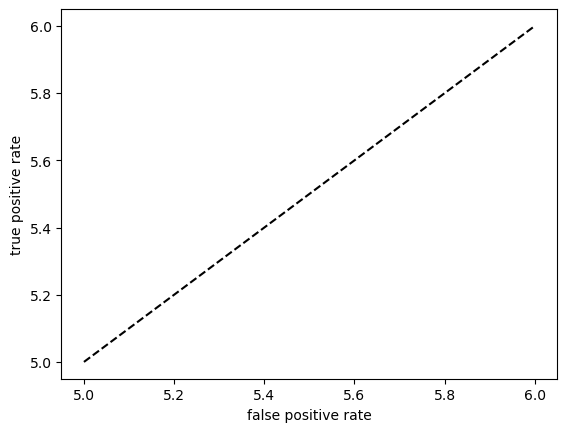

Auc score:   
 69.92793514162747


In [98]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test, y_pred_prob,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot([5,6],[5,6], 'k--')
plt.plot(fpr,tpr,label = 'lr(area = %0.2f)'% roc_auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

auc_score = roc_auc_score(y_test, final_model.predict(x_test))
print('Auc score: ', '','\n', auc_score*100)


TypeError: 'str' object is not callable

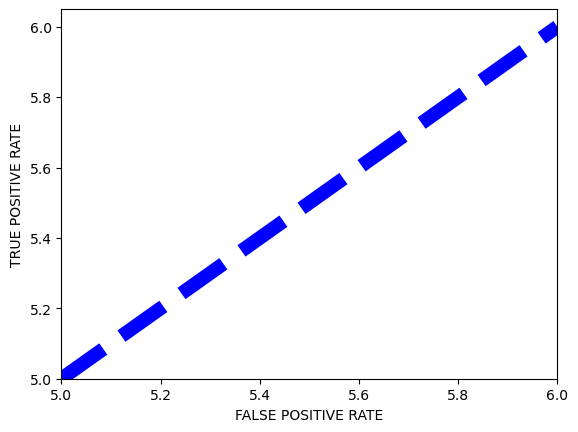

In [101]:
fpr,tpr,threshold = roc_curve(pred, y_test,pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([5,6],[5,6], color = 'blue', lw = 10, linestyle = '--')
plt.xlim([5.0,6.0])
plt.ylim([5.0,6.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title('ROC')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
import joblib
joblib.dump(final_model, "Telecom_Customer_Churn_Analysis1.pkl")

In [ ]:
model = joblib.load("Telecom_Customer_Churn_Analysis1.pkl")
prediction = model.predict(x_test)
prediction

In [ ]:
a= np.array(y_test)
data = pd.DataFrame()
data["predicted"] = prediction
data["original"]  = a
data

In [ ]:
creating dataframe

In [ ]:
conclusion = pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ["predicted", "original"])
conclusion